In [1]:
%pylab inline
from scipy import signal
import scipy

Populating the interactive namespace from numpy and matplotlib


## create an artificial signal

A sampling rate of 1 kHz

In [2]:
# parameters
srate  = 1000 # 1000 Hz
x = np.arange(-5, 5-1/srate, 1/srate)

# signal components
laplace  = 1-np.exp(-np.abs(x))
fastsine = 0.25*np.sin(2*np.pi*x*15) # amplitude .25 and frequency 15

# combine into one signal (no noise)
mysignal = laplace + fastsine
print(f'Sampling rate {srate} Hz')

Sampling rate 1000 Hz


In [3]:
# power spectrum (O = original)
Nyquist = srate/2.

print(f'Nyquist frequency: {Nyquist} Hz')
Nsamples = int( np.floor(mysignal.size)/2 )
hz = np.linspace(0, srate/2, Nsamples + 1 )
dHz = hz[1]

signalO_pow = np.abs(2*np.fft.fft(mysignal)/mysignal.size)**2
signalO_pow = signalO_pow[:len(hz)]

FourierCoeff = np.fft.fft(mysignal)/mysignal.size
DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate( (DC, np.abs(2*FourierCoeff[1:])) )

Nyquist frequency: 500.0 Hz


(0, 100)

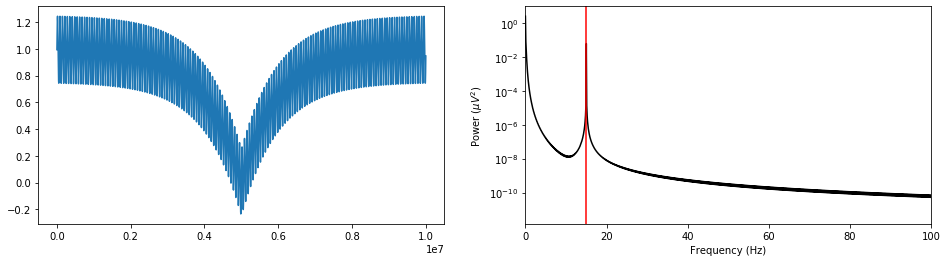

In [4]:
# Plot all together
time = np.arange(mysignal.size)*srate

fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].plot(time, mysignal)
ax[1].semilogy(hz, signalO_pow, color='k')
ax[1].axvline(x=15, color='r')
ax[1].set_xlabel('Frequency (Hz)'), ax[1].set_ylabel("Power ($\mu V^2$)")
ax[1].set_xlim(xmin=0, xmax=100)

## Brutal downsample

In [5]:
dnsampleFactor = 50
new_signal = mysignal[:-1:dnsampleFactor]
new_srate = srate/50.
print(f'new sampling rate {new_srate} Hz')

new sampling rate 20.0 Hz


In [6]:
# Fourier transform

Nyquist = new_srate/2 # half or the sampling rate
print(f'Nyquist frequency: {Nyquist} Hz')
Nsamples = int( np.floor(new_signal.size)/2 ) # half number of samples
hz = np.linspace(0, Nyquist, num = Nsamples + 1)
dhz = hz[1] # frequency resolution

power = np.abs(2*np.fft.fft(new_signal)/new_signal.size)**2
power = power[:hz.size]

Nyquist frequency: 10.0 Hz


(0, 20)

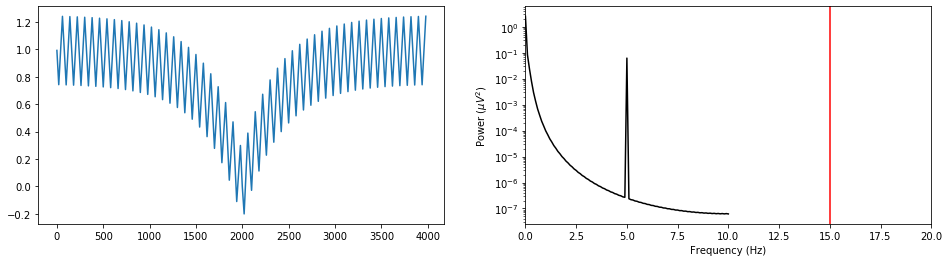

In [7]:
# Plot all together
time = np.arange(new_signal.size)*new_srate
fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].plot(time, new_signal)

ax[1].semilogy(hz, power, color='k')
ax[1].axvline(x=15, color='r')
ax[1].set_xlabel('Frequency (Hz)'), ax[1].set_ylabel("Power ($\mu V^2$)")
ax[1].set_xlim(xmin=0, xmax=20)

## Resample

In [8]:
dnsampleFactor = 50
new_signal = signal.resample(mysignal, int(mysignal.size/50))
new_srate = srate/50.
print(f'new sampling rate {new_srate} Hz')

new sampling rate 20.0 Hz


In [9]:
# Fourier transform

Nyquist = new_srate/2 # half or the sampling rate
print(f'Nyquist frequency: {Nyquist} Hz')
Nsamples = int( np.floor(new_signal.size)/2 ) # half number of samples
hz = np.linspace(0, Nyquist, num = Nsamples + 1)
dhz = hz[1] # frequency resolution

power = np.abs(2*np.fft.fft(new_signal)/new_signal.size)**2
power = power[:hz.size]

Nyquist frequency: 10.0 Hz


(0, 10)

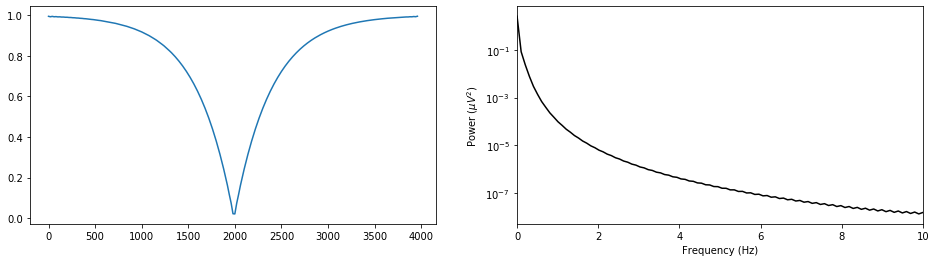

In [10]:
# Plot all together
time = np.arange(new_signal.size)*new_srate
fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].plot(time, new_signal)
ax[1].semilogy(hz, power, color='k')
ax[1].set_xlabel('Frequency (Hz)'), ax[1].set_ylabel("Power ($\mu V^2$)")
ax[1].set_xlim(xmin=0, xmax=10)

In [11]:
mysignal[:10]

array([0.99326205, 1.01678239, 1.04009389, 1.06298959, 1.08526619,
       1.1067259 , 1.1271782 , 1.14644149, 1.16434471, 1.18072891])

## Resample after low-pass filtering

In [12]:
# low pass filter

Nyquist = srate/2 # from 30 kHz sampling rate
cutoff = 20/Nyquist # normalize to Nyquist freq.

# define filter kernel
b, a = signal.butter(N=4, Wn = cutoff, btype='lowpass', analog=False)

# data is a NumPy array
fsignal = signal.filtfilt(b,a, mysignal)

In [13]:
dnsampleFactor = 50
new_signal = signal.resample(mysignal, int(mysignal.size/50))
new_srate = srate/50.
print(f'new sampling rate {new_srate} Hz')

new sampling rate 20.0 Hz


In [14]:
# Fourier transform

Nyquist = new_srate/2 # half or the sampling rate
print(f'Nyquist frequency: {Nyquist} Hz')
Nsamples = int( np.floor(new_signal.size)/2 ) # half number of samples
hz = np.linspace(0, Nyquist, num = Nsamples + 1)
dhz = hz[1] # frequency resolution

power = np.abs(2*np.fft.fft(new_signal)/new_signal.size)**2
power = power[:hz.size]

Nyquist frequency: 10.0 Hz


(0, 10)

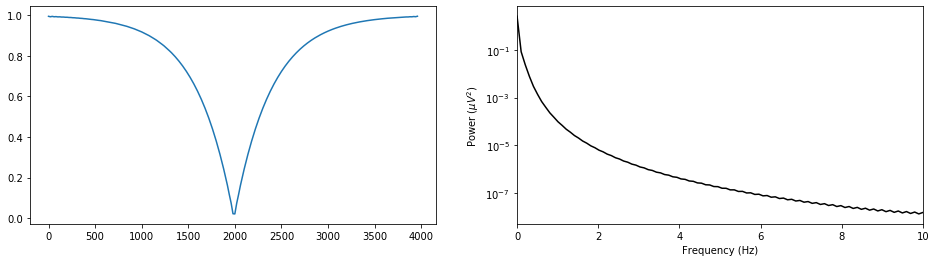

In [15]:
# Plot all together
time = np.arange(new_signal.size)*new_srate
fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].plot(time, new_signal)
ax[1].semilogy(hz, power, color='k')
ax[1].set_xlabel('Frequency (Hz)'), ax[1].set_ylabel("Power ($\mu V^2$)")
ax[1].set_xlim(xmin=0, xmax=10)

In [16]:
mysignal[:10]

array([0.99326205, 1.01678239, 1.04009389, 1.06298959, 1.08526619,
       1.1067259 , 1.1271782 , 1.14644149, 1.16434471, 1.18072891])